# 네이버 식당(홍콩구락부 대흥본점) 리뷰 크롤링

#### beautifulsoup4, selenium, xlsxwriter 설치

In [44]:
#!pip3 install beautifulsoup4

In [45]:
#!pip install selenium

In [46]:
!pip install xlsxwriter

#### 필요한 패키지 임폴트

In [47]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import requests
import re
import pandas as pd
import numpy as np
import os
import time
import urllib.request
from selenium.webdriver.common.keys import Keys

import warnings
warnings.filterwarnings('ignore')

#### 셀레니움을 이용해 크롬드라이브 제어 및 url 가져오기

In [48]:
#/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://m.place.naver.com/restaurant/1843075551/review/visitor?entry=ple")
#time.sleep(2)

In [49]:
#driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[5]').click()

In [50]:
driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')

In [51]:
prev_height = driver.execute_script('return document.body.scrollHeight')

#### 웹자동화 : 더보기 -> 스크롤 반복

In [65]:
while True:
    try:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(3)

        current_height = driver.execute_script('return document.body.scrollHeight')

        
        driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[7]/div[2]/div[3]/div[2]/a').click()
        
        
        if prev_height == current_height:
            break
              
        prev_height = current_height
        #time.sleep(1)
    except:
        print("마지막 페이지입니다.")
        break
        
#driver.quit()
        

마지막 페이지입니다.


#### 현재페이지의 html 코드 가져오기
    여기서 에러가 발생... 
    모든 리뷰가 코드에 반영되어 있지만 가져오지 못함 
    * 해결방법: driver.page_source를 이용해 현재 페이지 코드를 가져올 수 있었음

<html lang="ko"><head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-180.png" re
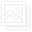
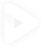
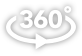
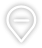

In [66]:
soup = BeautifulSoup(driver.page_source,'html.parser')
soup

In [67]:
review = soup.find('a',{'class':'xHaT3'}).get_text()
review

'대흥동 홍콩구락부 술집 추천할게요! 분위기도 좋고 마치 여행 온 느낌이에요! 이국적인 요리지만 거부감 없이 다 먹을 수 있는 맛있는 안주들이 잔뜩 있구오 분위기도 진짜 홍콩에 온 것 같은 느낌이에요!! 사진찍기 너무 좋고 안주도 전체적으로 다 마싰습니다 ㅎㅎㅎ 칭따오나 연태고량주도 있어서 더 좋아요 ㅎㅎㅎ 대흥동 술집 찾으시는 분들 가보시면 좋을 것 같아요 ㅎㅎㅎ'

In [68]:
review = soup.find('li',{'class':'YeINN'})
len(review)

5

In [69]:
review = soup.find_all('ul',{'class':'eCPGL'})
review

[<ul class="eCPGL"><li class="YeINN"><div class="Lia3P"><a class="DqSJm" href="https://m.place.naver.com/my/5e5c77748f87a842bc8545b9/review?v=2" role="button" target="_blank"><div class="place_thumb"><img alt="프로필" class="fKa0W" height="38" src="https://search.pstatic.net/common/?autoRotate=true&amp;quality=95&amp;type=w250&amp;src=https%3A%2F%2Fphinf.pstatic.net%2Fcontact%2F20220131_156%2F16436175228106D408_GIF%2FprofileImage.gif" width="38"/></div></a><a class="Hazns" href="https://m.place.naver.com/my/5e5c77748f87a842bc8545b9/review?v=2" role="button" target="_blank"><div class="sBWyy">hat****</div><div class="Qde7Q"><span class="P1zUJ">리뷰 <!-- -->65</span><span class="P1zUJ">사진 <!-- -->596</span><span class="P1zUJ">팔로워 <!-- -->7</span></div></a><a class="wFqB7" href="#" role="button">팔로우</a></div><div class="Mmpzx"><div class="ngGKH"><div class="flicking-viewport" style="user-select: none; -webkit-user-drag: none; touch-action: pan-y;"><div class="flicking-camera" style="transform:

#### 뷰티풀수프의 find_all 을 통해 전체 리뷰 가져오기

In [70]:
review = soup.find_all('div',{'class':'ZZ4OK IwhtZ'})
review
#zPfVt
#ZZ4OK IwhtZ

[<div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">대흥동 홍콩구락부 술집 추천할게요! 분위기도 좋고 마치 여행 온 느낌이에요! 이국적인 요리지만 거부감 없이 다 먹을 수 있는 맛있는 안주들이 잔뜩 있구오 분위기도 진짜 홍콩에 온 것 같은 느낌이에요!! 사진찍기 너무 좋고 안주도 전체적으로 다 마싰습니다 ㅎㅎㅎ 칭따오나 연태고량주도 있어서 더 좋아요 ㅎㅎㅎ 대흥동 술집 찾으시는 분들 가보시면 좋을 것 같아요 ㅎㅎㅎ</span></a></div>,
 <div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">유성에 홍콩구락부 가보고 너무 맘에들어서 본점도 기대를 가지고 방문했는데 음 좀 실망했어요 우육탕 정말 건더기는 별로 없고 국물만 가득인데(사진이 나왔을때 바로 찍은건데 청경채 3개만 둥둥 안
 에 차돌 조금 끝 ㅋ 메뉴판 사진과 너무 다르쟈나요 .) 그나마 국물은 맛있어서 다행..이었고 라즈지나 궁보계정은 중국에서 먹던 맛 기대했는데(라즈지는 엄청 바삭해야하는데 여긴 튀김옷이 넘 두껍고 
 그냥 치킨같았어요) 모닝글로리를 제일 맛있게 먹었네요.. 뭐 한국화시켰다면 어쩔 수 앖지만 기대를.너무 했나봅니다🙁🥲</span><span class="rvCSr"><svg aria-hidden="true" class="Ky28p" viewbox="0 0 12 7" xmlns="http://www.w3.org/2000/svg"><path d="M11.47.52a.74.74 0 00-1.04 0l-4.4 4.45v.01L1.57.52A.74.74 0 10.53 1.57l5.12 5.08a.5.5 0 00.7 0l5.12

In [71]:
reviews = soup.find_all('span',{'class':'zPfVt'})
reviews

[<span class="zPfVt">대흥동 홍콩구락부 술집 추천할게요! 분위기도 좋고 마치 여행 온 느낌이에요! 이국적인 요리지만 거부감 없이 다 먹을 수 있는 맛있는 안주들이 잔뜩 있구오 분위기도 진짜 홍콩에 온 것 같은 느낌이에요!! 사진찍기 너무 좋고 안주도 전체적으로 다 마싰습니다 ㅎㅎㅎ 칭따오나 연태고량주도 있어서 더 좋아요 ㅎㅎㅎ 대흥동 술집 찾으시는 분들 가보시면 좋을 것 같아요 ㅎㅎㅎ</span>,
 <span class="zPfVt">유성에 홍콩구락부 가보고 너무 맘에들어서 본점도 기대를 가지고 방문했는데 음 좀 실망했어요 우육탕 정말 건더기는 별로 없고 국물만 가득인데(사진이 나왔을때 바로 찍은건데 청경채 3개만 둥둥 안
 에 차돌 조금 끝 ㅋ 메뉴판 사진과 너무 다르쟈나요 .) 그나마 국물은 맛있어서 다행..이었고 라즈지나 궁보계정은 중국에서 먹던 맛 기대했는데(라즈지는 엄청 바삭해야하는데 여긴 튀김옷이 넘 두껍고 
 그냥 치킨같았어요) 모닝글로리를 제일 맛있게 먹었네요.. 뭐 한국화시켰다면 어쩔 수 앖지만 기대를.너무 했나봅니다🙁🥲</span>,
 <span class="zPfVt">광동식갈비 볶음밥이 진짜 맛있어요. 현지에 있어도 맛집으로 줄설 듯.
 코코넛 시리얼 새우나 모닝글로리는 평범한 맛.
 마지막으로 디저트인 밀크티 푸딩도 꼭 드셔보시길.</span>,
 <span class="zPfVt">홍콩 느낌으로 유명한 곳이여서 맛은 기대 안하고 갔는데 음식 하나하나 정말 맛있더라구요!!!!!!! 술한잔 하기 딱 좋은곳있어요 특히 대전에만 있는곳이라서 지인들 오면 데리고 가기 좋아요!😃</span>,
 <span class="zPfVt">친구들가 가볍게 식사하고
 망고맥주가 너무 맛있었어요🥹</span>,
 <span class="zPfVt">인테리어 보고찾아왓는데 너무너무맛있어요 ㅠㅠ 동파육도 부드럽고 소스도 너뮤 맛있고 우육면 당면추가해서먹으면 좋아요 밥도 먹고싶어서 볶음밥도 시켯는데 엄청 꼬들하고 맛있어요~ 밀크티푸딩은 꼭 드셔야

In [72]:
len(reviews)

294

#### 리뷰를 데이터프레임화 시켜 엑셀파일로 저장

In [73]:
review_list = []

for review in reviews:
    comment = review.get_text()
    review_list.append(comment)

#.get_text().strip()

df2 = pd.DataFrame({'review':review_list})

In [74]:
len(df2)

294

In [75]:
df2.head(15)

,review
0,대흥동 홍콩구락부 술집 추천할게요! 분위기도 좋고 마치 여행 온 느낌이에요! 이국적...
1,유성에 홍콩구락부 가보고 너무 맘에들어서 본점도 기대를 가지고 방문했는데 음 좀 실...
2,광동식갈비 볶음밥이 진짜 맛있어요. 현지에 있어도 맛집으로 줄설 듯.\n코코넛 시리...
3,홍콩 느낌으로 유명한 곳이여서 맛은 기대 안하고 갔는데 음식 하나하나 정말 맛있더라...
4,친구들가 가볍게 식사하고\n망고맥주가 너무 맛있었어요🥹
5,인테리어 보고찾아왓는데 너무너무맛있어요 ㅠㅠ 동파육도 부드럽고 소스도 너뮤 맛있고 ...
6,대전 처음 와서 방문한 홍콩요리 집이에요😀 들어오자마자 홍콩 분위기가 물씬 풍겨서 ...
7,지삼선과 코코넛새우를 시켰습니다.\n양은 타 봉명동의 중화주점과 비교하여 양이 현저...
8,매번 지나만 다니다 다음주 싱가포르 여행 준비하다가 모닝글로리에 빠져서 방문했는데 ...
9,음식 다 맛있어요 b\n혁명소주 꼭드세요 훅감 😵‍💫\n대전 핫플 찜 💯


In [76]:
df2.shape[0]

294

In [77]:
df2.to_excel('HK_Mara_review.xlsx')